In [1]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

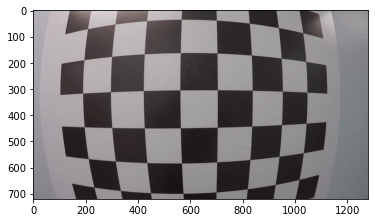

In [2]:
# Make a list of calibration images
img = cv2.imread('calibration_test.png')
plt.imshow(img)

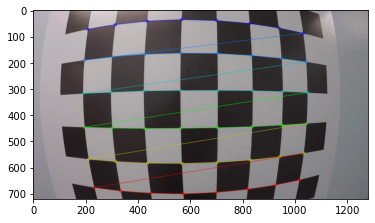

In [3]:


# prepare object points
nx = 8#TODO: enter the number of inside corners in x
ny = 6#TODO: enter the number of inside corners in y



# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Find the chessboard corners
ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)

# If found, draw corners
if ret == True:
    # Draw and display the corners
    cv2.drawChessboardCorners(img, (nx, ny), corners, ret)
    plt.imshow(img)

In [4]:
corners

array([[[ 209.49168 ,   72.759445]],

       [[ 314.52362 ,   54.58995 ]],

       [[ 435.51456 ,   42.035755]],

       [[ 567.81757 ,   36.470123]],

       [[ 702.005   ,   40.031147]],

       [[ 827.8688  ,   51.39282 ]],

       [[ 938.9422  ,   68.43589 ]],

       [[1032.1531  ,   88.22164 ]],

       [[ 195.65141 ,  190.71077 ]],

       [[ 301.68405 ,  178.15556 ]],

       [[ 426.42334 ,  168.19281 ]],

       [[ 563.9286  ,  163.79163 ]],

       [[ 704.30273 ,  165.36145 ]],

       [[ 835.97034 ,  172.888   ]],

       [[ 949.44946 ,  184.23866 ]],

       [[1043.4532  ,  197.34889 ]],

       [[ 190.99168 ,  317.9877  ]],

       [[ 297.00378 ,  312.99814 ]],

       [[ 423.02908 ,  308.16754 ]],

       [[ 562.5084  ,  305.60114 ]],

       [[ 705.7149  ,  305.5154  ]],

       [[ 838.9999  ,  307.0742  ]],

       [[ 954.1834  ,  310.37695 ]],

       [[1048.1006  ,  314.29034 ]],

       [[ 196.98315 ,  446.27444 ]],

       [[ 302.44067 ,  449.15967 ]],

       [[ 42

whole thing

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# prepare object points
nx = 8#TODO: enter the number of inside corners in x
ny = 6#TODO: enter the number of inside corners in y

# Make a list of calibration images
fname = 'calibration_test.png'
img = cv2.imread(fname)

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Find the chessboard corners
ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)

# If found, draw corners
if ret == True:
    # Draw and display the corners
    cv2.drawChessboardCorners(img, (nx, ny), corners, ret)
    plt.imshow(img)

In [ ]:
objp = np.zeros((6*8,3), np.float32)
objp

In [ ]:
np.mgrid[0:8,0:6] #generate the corrdinates for x and y -returns the coordinate values for a given grid size 

In [ ]:
objp[:,:2] = np.mgrid[0:8,0:6].reshape(-1,2)

In [ ]:

objp

In [ ]:
objP = np.zeros((6*8,3),np.float32)
objP[:,:2] = np.mgrid[0:8,0:6].T.reshape(-1,2)
objP

In [ ]:
img.shape[:2]

In [ ]:
img.shape[1::-1] #ask for the first 2 values and reverse them

Quiz

In [ ]:
import pickle
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Read in the saved objpoints and imgpoints
dist_pickle = pickle.load( open( "wide_dist_pickle.p", "rb" ) )
objpoints = dist_pickle["objpoints"]
imgpoints = dist_pickle["imgpoints"]

# Read in an image
img = cv2.imread('test_image.png')

# TODO: Write a function that takes an image, object points, and image points
# performs the camera calibration, image distortion correction and 
# returns the undistorted image
def cal_undistort(img, objpoints, imgpoints):
    # Use cv2.calibrateCamera() and cv2.undistort()
    ret,mtx,dist,rvecs,tvecs = cv2.calibrateCamera(objpoints,imgpoints,img.shape[1::-1],None,None)
    undist = cv2.undistort(img,mtx,dist,None,mtx)
    return undist

undistorted = cal_undistort(img, objpoints, imgpoints)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(undistorted)
ax2.set_title('Undistorted Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

user answer

In [ ]:
import pickle
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Read in the saved objpoints and imgpoints
dist_pickle = pickle.load( open( "wide_dist_pickle.p", "rb" ) )
objpoints = dist_pickle["objpoints"]
imgpoints = dist_pickle["imgpoints"]

# Read in an image
img = cv2.imread('test_image.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) # Convert to grayscale

# TODO: Write a function that takes an image, object points, and image points
# performs the camera calibration, image distortion correction and 
# returns the undistorted image
def cal_undistort(img, objpoints, imgpoints):
    # Use cv2.calibrateCamera() and cv2.undistort()
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
    dst = cv2.undistort(img, mtx, dist, None, mtx)
    return dst

undistorted = cal_undistort(img, objpoints, imgpoints)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(undistorted)
ax2.set_title('Undistorted Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

In [ ]:
img.shape[1::-1]

Quiz

my solution

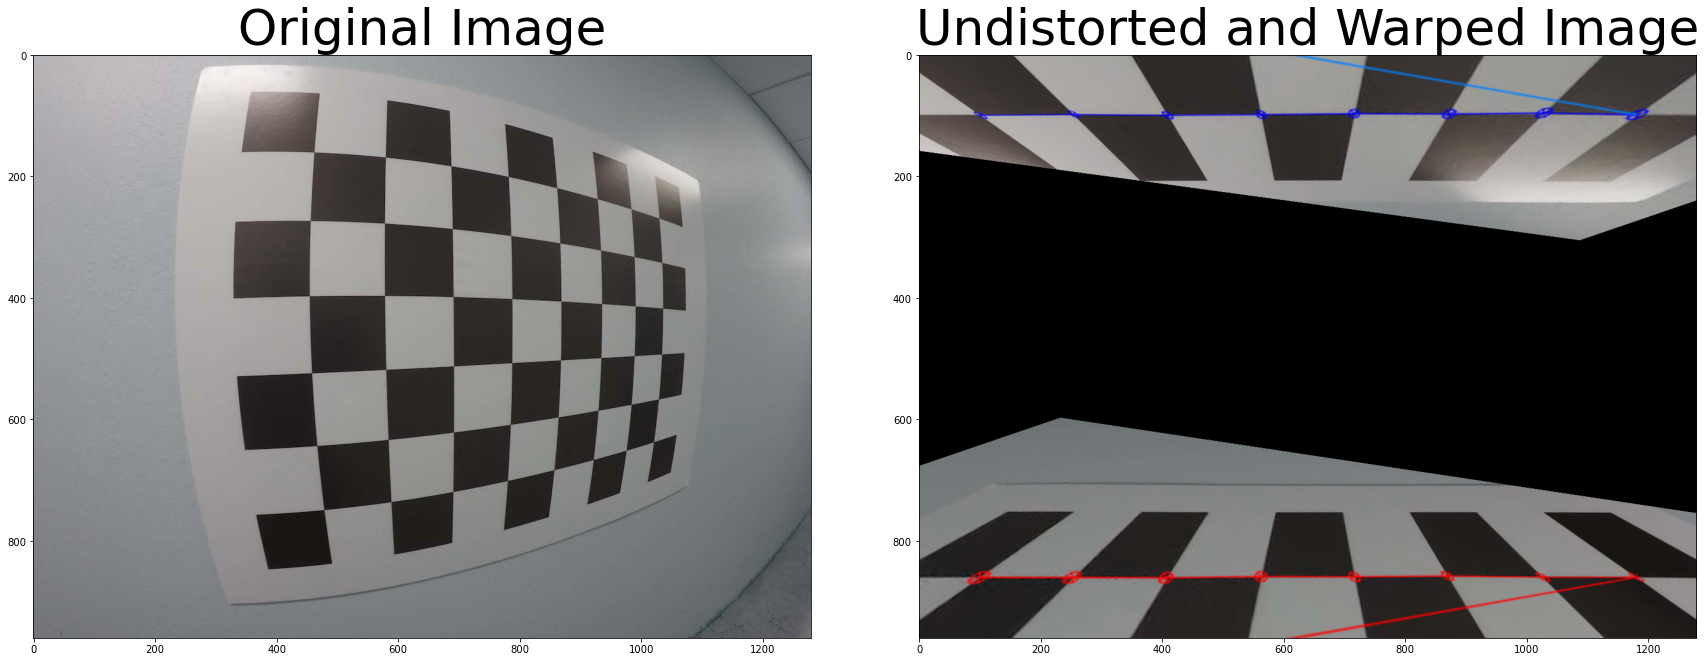

In [1]:
import pickle
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Read in the saved camera matrix and distortion coefficients
# These are the arrays you calculated using cv2.calibrateCamera()
dist_pickle = pickle.load( open( "wide_dist_pickle.p", "rb" ) )
mtx = dist_pickle["mtx"]
dist = dist_pickle["dist"]

# Read in an image
img = cv2.imread('test_image2.png')
nx = 8 # the number of inside corners in x
ny = 6 # the number of inside corners in y

# MODIFY THIS FUNCTION TO GENERATE OUTPUT 
# THAT LOOKS LIKE THE IMAGE ABOVE
def corners_unwarp(img, nx, ny, mtx, dist):
    img_size = (img.shape[1],img.shape[0])
    # Pass in your image into this function
    # Write code to do the following steps
    # 1) Undistort using mtx and dist
    undistorted = cv2.undistort(img, mtx, dist, None, mtx)
    # 2) Convert to grayscale
    grey = cv2.cvtColor(undistorted,cv2.COLOR_BGR2GRAY)
    # 3) Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(grey, (nx,ny), None)
    # 4) If corners found:
    if ret == True:
        cv2.drawChessboardCorners(undistorted, (nx,ny), corners, ret)
            # a) draw corners
            # b) define 4 source points src = np.float32([[,],[,],[,],[,]])
        src = np.float32([corners[0], corners[nx-1],corners[(ny-1)*nx],corners[-1]])
                 #Note: you could pick any four of the detected corners 
                 # as long as those four corners define a rectangle
                 #One especially smart way to do this would be to use four well-chosen
                 # corners that were automatically detected during the undistortion steps
                 #We recommend using the automatic detection of corners in your code
        # c) define 4 destination points dst = np.float32([[,],[,],[,],[,]])
        #src = np.float32([corners[0], corners[nx-1], corners[-1], corners[-nx]])
        dest = np.float32([[100,100],[1900,100],[100,900],[1900,900]])
        offset = 100
        dest = np.float32([[offset, offset], [img_size[0]-offset, offset], 
                                   [img_size[0]-offset, img_size[1]-offset], 
                                   [offset, img_size[1]-offset]])
        # d) use cv2.getPerspectiveTransform() to get M, the transform matrix
        M = cv2.getPerspectiveTransform(src,dest)
        Minv = cv2.getPerspectiveTransform(dest,src)
        # e) use cv2.warpPerspective() to warp your image to a top-down view
        warped = cv2.warpPerspective(undistorted,M,img_size,flags=cv2.INTER_LINEAR)
    #delete the next two lines 
    return warped, M

top_down, perspective_M = corners_unwarp(img, nx, ny, mtx, dist)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(top_down)
ax2.set_title('Undistorted and Warped Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

In [25]:
src = np.float32([corners[0], corners[nx-1],corners[(ny-1)*nx],corners[-1]])
src

array([[[ 209.49168 ,   72.759445]],

       [[1032.1531  ,   88.22164 ]],

       [[ 234.32358 ,  675.9494  ]],

       [[1017.78265 ,  647.083   ]]], dtype=float32)

In [11]:
corners[2*nx]

array([[190.99168, 317.9877 ]], dtype=float32)

In [20]:
src = np.float32([corners[0], corners[nx-1], corners[-1], corners[-nx]])
src

array([[[ 209.49168 ,   72.759445]],

       [[1032.1531  ,   88.22164 ]],

       [[1017.78265 ,  647.083   ]],

       [[ 234.32358 ,  675.9494  ]]], dtype=float32)

In [21]:
src = np.float32([corners[0], corners[nx-1],corners[(ny-1)*nx],corners[-1]])
src

array([[[ 209.49168 ,   72.759445]],

       [[1032.1531  ,   88.22164 ]],

       [[ 234.32358 ,  675.9494  ]],

       [[1017.78265 ,  647.083   ]]], dtype=float32)

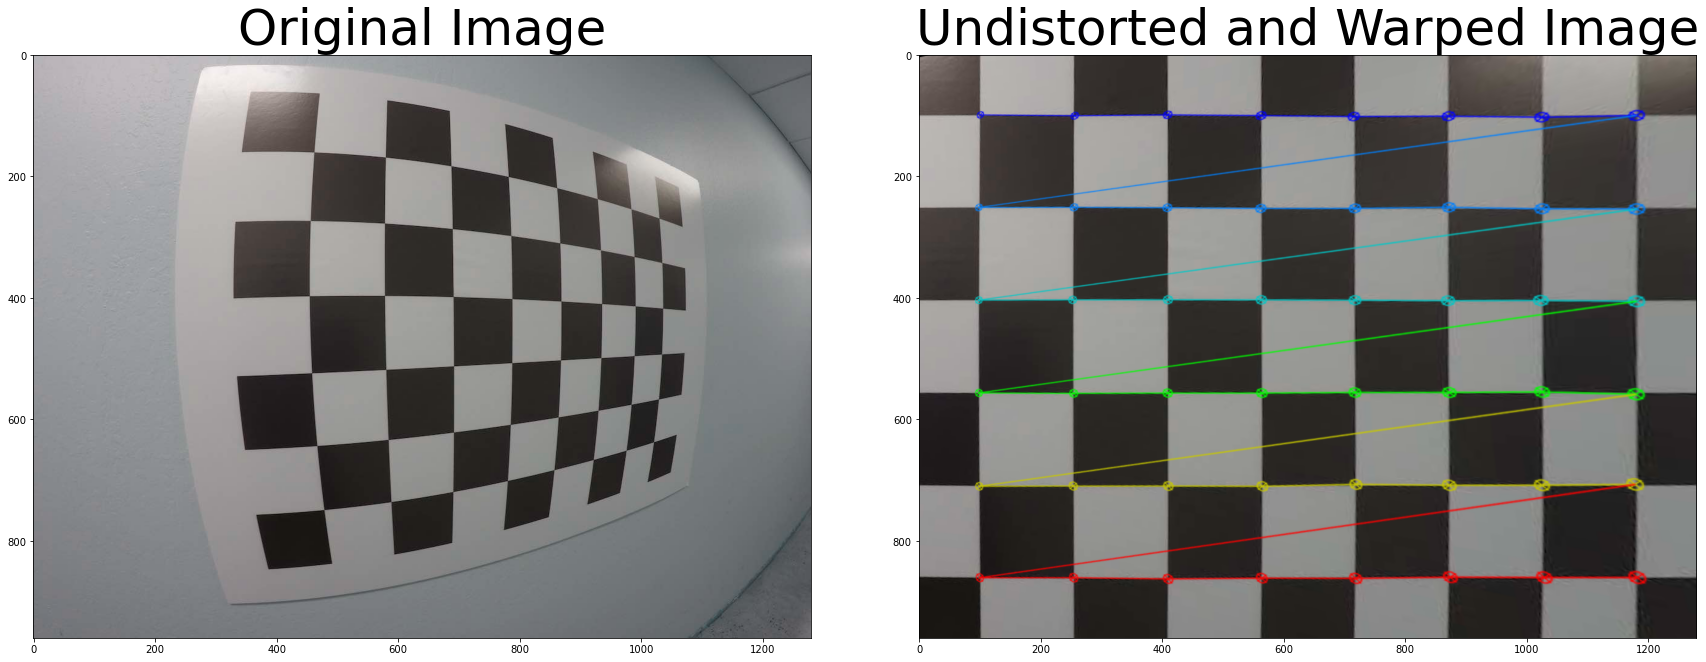

In [40]:
# Define a function that takes an image, number of x and y points, 
# camera matrix and distortion coefficients
def corners_unwarp(img, nx, ny, mtx, dist):
    # Use the OpenCV undistort() function to remove distortion
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    # Convert undistorted image to grayscale
    gray = cv2.cvtColor(undist, cv2.COLOR_BGR2GRAY)
    # Search for corners in the grayscaled image
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)

    if ret == True:
        # If we found corners, draw them! (just for fun)
        cv2.drawChessboardCorners(undist, (nx, ny), corners, ret)
        # Choose offset from image corners to plot detected corners
        # This should be chosen to present the result at the proper aspect ratio
        # My choice of 100 pixels is not exact, but close enough for our purpose here
        offset = 100 # offset for dst points
        # Grab the image shape
        img_size = (gray.shape[1], gray.shape[0])

        # For source points I'm grabbing the outer four detected corners
        src = np.float32([corners[0], corners[nx-1], corners[-1], corners[-nx]])
        # For destination points, I'm arbitrarily choosing some points to be
        # a nice fit for displaying our warped result 
        # again, not exact, but close enough for our purposes
        dst = np.float32([[offset, offset], [img_size[0]-offset, offset], 
                                     [img_size[0]-offset, img_size[1]-offset], 
                                     [offset, img_size[1]-offset]])
        # Given src and dst points, calculate the perspective transform matrix
        M = cv2.getPerspectiveTransform(src, dst)
        # Warp the image using OpenCV warpPerspective()
        warped = cv2.warpPerspective(undist, M, img_size)

    # Return the resulting image and matrix
    return warped, M
top_down, perspective_M = corners_unwarp(img, nx, ny, mtx, dist)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(top_down)
ax2.set_title('Undistorted and Warped Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)